<a href="https://www.kaggle.com/code/mh0386/logistic-regression?scriptVersionId=126710796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
from keras.datasets import mnist
import numpy as np
from matplotlib.pyplot import plot as plt
import sys

# Standardization

In [2]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

# Prediction

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def predict(X, W, B):
    pred = sigmoid(np.dot(X, W) + B)
    pred[pred >= 0.5] = 1
    pred[pred < 0.5] = 0
    return pred

# Cost Function

In [5]:
def cost(y, y_hat):
    return np.mean(-y * np.log(y_hat + sys.float_info.min) - (1 - y) * np.log(1 - y_hat + sys.float_info.min))

# Train

In [6]:
def train(X, y, learning_rate, epochs):
    W = np.random.random(X.shape[1])
    B = np.random.random()
    costs = np.array([])
    for i in range(epochs):
        y_hat = predict(X, W, B)
        dW = np.dot(X.T, (y_hat - y)) / len(X)
        db = np.mean(y_hat - y)
        W -= learning_rate * dW
        B -= learning_rate * db
        if i % 100 == 0:
            costValue: float = cost(y, y_hat)
            costs = np.append(costs, costValue)
            print(f"Cost at epoch {i}: {costValue}")
    return W, B, costs

# Test

In [7]:
def test(X, y, W, b):
    y_hat = predict(X, W, b)
    return accuracy(y, y_hat)

# Accuracy

In [8]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

# Loading the data

In [9]:
trainSet, testSet = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Get the class 0 and class 1

In [10]:
xTrain = trainSet[0].astype('float32')
yTrain = trainSet[1].astype('int32')
xTrain = xTrain.reshape(xTrain.shape[0], -1)
xTrain = np.concatenate([xTrain[yTrain == 0], xTrain[yTrain == 1]])
yTrain = np.concatenate([yTrain[yTrain == 0], yTrain[yTrain == 1]])
xTrain = standardize(xTrain)

p = np.random.permutation(len(xTrain))
xTrain = xTrain[p]
yTrain = yTrain[p]

k = 10
iterations = 1000

# K-Fold Cross Validation

In [11]:
def k_fold_cross_validation(X, y, K, lr, epochs):
    fold_size = len(X) // K
    accuracies = []
    for i in range(K):
        # Divide the data into training and testing sets
        X_train = np.concatenate([X[:i * fold_size], X[(i + 1) * fold_size:]])
        Y_train = np.concatenate([y[:i * fold_size], y[(i + 1) * fold_size:]])
        X_test = X[i * fold_size:(i + 1) * fold_size]
        Y_test = y[i * fold_size:(i + 1) * fold_size]
        # Train the model
        print(f"\nTraining at Iteration {i + 1} of {K}")
        w, b, Costs = train(X_train, Y_train, lr, epochs)
        # Test the model
        print(f"\nTesting at Iteration {i + 1} of {K}")
        acc = test(X_test, Y_test, w, b)
        print(f"Accuracy at Iteration {i + 1} of {K}: {acc}")
        accuracies.append(acc)
    return np.mean(accuracies), Costs, w, b

# Running Code

## At Learning Rate 0.1

----------K-Fold Cross Validation with 10 Folds and eta 0.1----------

Training at Iteration 1 of 10
Cost at epoch 0: 660.6686836929993
Cost at epoch 100: 13.609861887759088
Cost at epoch 200: 6.525276247555726
Cost at epoch 300: 4.909493557684785
Cost at epoch 400: 3.7908747723895173
Cost at epoch 500: 3.0451289155260057
Cost at epoch 600: 2.858692451310128
Cost at epoch 700: 2.423674034806413
Cost at epoch 800: 2.1129465944466164
Cost at epoch 900: 2.050801106374657

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.995260663507109

Training at Iteration 2 of 10
Cost at epoch 0: 658.8664645389124
Cost at epoch 100: 13.485570911615168
Cost at epoch 200: 7.581749544779035
Cost at epoch 300: 5.468802950332419
Cost at epoch 400: 4.3501841650371516
Cost at epoch 500: 3.604438308173639
Cost at epoch 600: 2.9829834274540468
Cost at epoch 700: 2.6101104990222908
Cost at epoch 800: 2.423674034806413
Cost at epoch 900: 2.1750920825185758

Testing at Iteration 2 of 10
Accuracy at It

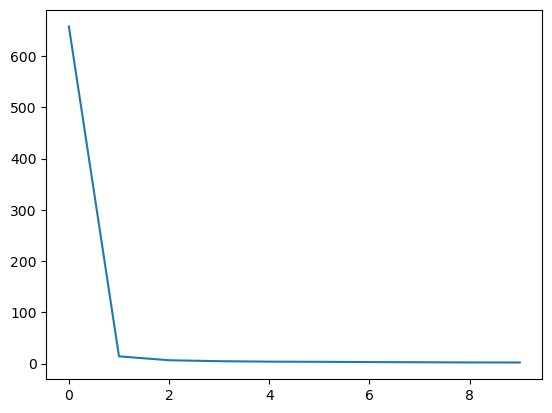

In [12]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.1----------")
average_accuracy, c, w, b = k_fold_cross_validation(xTrain, yTrain, k, 0.1, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

## At Learning Rate 0.01

----------K-Fold Cross Validation with 10 Folds and eta 0.01----------

Training at Iteration 1 of 10
Cost at epoch 0: 648.861040959327
Cost at epoch 100: 173.82093013727015
Cost at epoch 200: 71.90232969925692
Cost at epoch 300: 45.80122470903401
Cost at epoch 400: 33.4342725827141
Cost at epoch 500: 26.03895950215095
Cost at epoch 600: 21.6887753371138
Cost at epoch 700: 18.89222837387563
Cost at epoch 800: 16.779281779429013
Cost at epoch 900: 15.225644577630028

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.9786729857819905

Training at Iteration 2 of 10
Cost at epoch 0: 658.8043190508405
Cost at epoch 100: 175.56100380328505
Cost at epoch 200: 74.01527629370354
Cost at epoch 300: 45.98766117324988
Cost at epoch 400: 33.7450000230739
Cost at epoch 500: 26.722559870942504
Cost at epoch 600: 21.50233887289792
Cost at epoch 700: 19.265101302307382
Cost at epoch 800: 16.65499080328509
Cost at epoch 900: 14.977062625342192

Testing at Iteration 2 of 10
Accuracy at Iterat

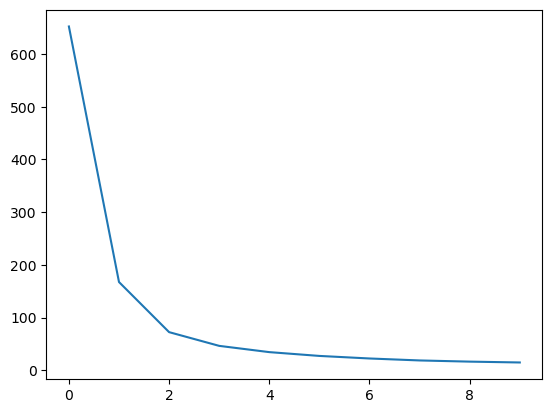

In [13]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.01----------")
average_accuracy, c, w, b = k_fold_cross_validation(xTrain, yTrain, k, 0.01, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

## At Learning Rate 0.001

----------K-Fold Cross Validation with 10 Folds and eta 0.001----------

Training at Iteration 1 of 10
Cost at epoch 0: 654.3919893977313
Cost at epoch 100: 623.6299728021115
Cost at epoch 200: 574.7214736894796
Cost at epoch 300: 508.287946940555
Cost at epoch 400: 434.89412552757113
Cost at epoch 500: 364.9183059585449
Cost at epoch 600: 305.07220094524814
Cost at epoch 700: 260.51388599765335
Cost at epoch 800: 221.23793753617508
Cost at epoch 900: 192.65101302307383

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.7519747235387045

Training at Iteration 2 of 10
Cost at epoch 0: 666.3860685956196
Cost at epoch 100: 641.7143098310517
Cost at epoch 200: 602.3762158815015
Cost at epoch 300: 549.1796780919043
Cost at epoch 400: 474.79152886976897
Cost at epoch 500: 399.2847608623385
Cost at epoch 600: 335.83421754086805
Cost at epoch 700: 280.4625876687523
Cost at epoch 800: 237.52005541102844
Cost at epoch 900: 201.72425428157985

Testing at Iteration 2 of 10
Accuracy at 

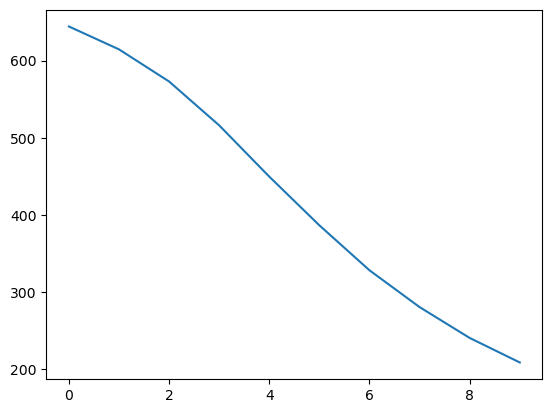

In [14]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.001----------")
average_accuracy, c, w, b = k_fold_cross_validation(xTrain, yTrain, k, 0.001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)

## At Learning Rate 0.0001

----------K-Fold Cross Validation with 10 Folds and eta 0.0001----------

Training at Iteration 1 of 10
Cost at epoch 0: 663.8381035846692
Cost at epoch 100: 661.4765750379346
Cost at epoch 200: 659.9850833242076
Cost at epoch 300: 657.996427705905
Cost at epoch 400: 655.8213356233864
Cost at epoch 500: 653.335516100508
Cost at epoch 600: 650.7875510895577
Cost at epoch 700: 648.2395860786074
Cost at epoch 800: 645.1944571630814
Cost at epoch 900: 642.5222011759871

Testing at Iteration 1 of 10
Accuracy at Iteration 1 of 10: 0.08925750394944708

Training at Iteration 2 of 10
Cost at epoch 0: 659.3636284434881
Cost at epoch 100: 656.6913724563938
Cost at epoch 200: 654.889153302307
Cost at epoch 300: 652.7140612197884
Cost at epoch 400: 650.7254056014857
Cost at epoch 500: 648.2395860786073
Cost at epoch 600: 645.3808936272972
Cost at epoch 700: 642.7086376402029
Cost at epoch 800: 639.663508724677
Cost at epoch 900: 636.8669617614389

Testing at Iteration 2 of 10
Accuracy at Iteration 

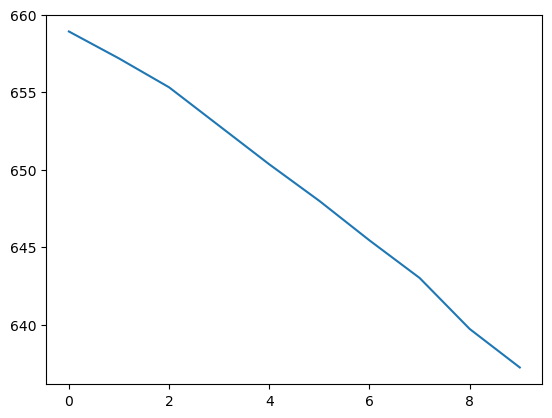

In [15]:
print(f"----------K-Fold Cross Validation with {k} Folds and eta 0.0001----------")
average_accuracy, c, w, b = k_fold_cross_validation(xTrain, yTrain, k, 0.0001, iterations)
print("\nAverage Accuracy: ", average_accuracy)
plt(c)